In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('heart.csv')
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [126]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [127]:
data_model = data [['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','thalach','target']]

In [128]:
data_model1 = data [['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach','exang', 'ca', 'thal','target']]

In [129]:
data_dum = pd.get_dummies(data_model)
data_dum1 = pd.get_dummies(data_model1)

In [130]:
from sklearn.model_selection import train_test_split
X= data_dum.drop('target',axis=1)
y = data_dum.target.values  #Data Dummy 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [131]:
import statsmodels.api as sm

In [132]:
X_sm = X = sm.add_constant(X)

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [133]:
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     26.11
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           9.95e-28
Time:                        06:05:20   Log-Likelihood:                -145.67
No. Observations:                 303   AIC:                             307.3
Df Residuals:                     295   BIC:                             337.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5748      0.309      1.859      0.064      -0.034       1.183
age           -0.0035      0.003     -1.172      0.242      -0.009       0.002
sex           -0.3016      0.050     -5.987      0.000      -0.401      -0.202
cp             0.1617      0.023      6.896      0.000       0.116       0.208
trestbps      -0.0038      0.001     -2.765      0.006      -0.007      -0.001
chol          -0.0008      0.000     -1.714      0.088      -0.002       0.000
fbs           -0.0169      0.066     -0.257      0.798      -0.146       0.113
thalach        0.0061      0.001      5.285      0.000       0.004       0.008
==============================================================================
Omnibus:                        8.894   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                5.074
Skew:                          -0.111   Prob(JB):                       0.0791
Kurtosis:                       2.406   Cond. No.                     4.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)

array([-0.34913624, -0.34758929, -0.34462768])

In [136]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-0.3471177398531087

In [137]:
lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-0.4387105898254804

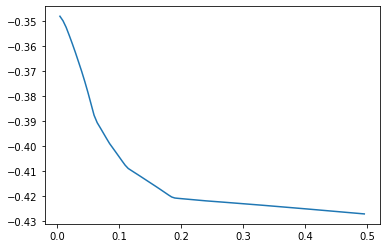

In [138]:
alpha = []
error = []
for i in range (1,100):
    alpha.append(i/200)
    lml = Lasso(alpha=(i/200))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))

plt.plot(alpha,error)
    
    

In [139]:
err = tuple(zip(alpha,error))
data_err = pd.DataFrame(err,columns = ['alpha','error'])
data_err [data_err.error == max(data_err.error)]

,alpha,error
0,0.005,-0.347978


In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.3343456452348381

In [142]:
from sklearn.model_selection import GridSearchCV


In [143]:
parameters = {'n_estimators':range(2,100,5), 'criterion':('mae','mse'),'max_features':('auto','sqrt','log2')}

In [144]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mae', 'mse'),
      

In [145]:
gs.best_score_
print(gs.score(X_test,y_test))

-0.2608695652173913


In [146]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [109]:
#prediction Side
predtest_lm = lm.predict(X_test)
predtest_rf = rf.predict(X_test)
predtest_gd = gs.best_estimator_.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predtest_lm)

0.30708555201527427

In [111]:
mean_absolute_error(y_test,predtest_rf)


0.2217391304347826

In [112]:
mean_absolute_error(y_test,predtest_gd)

0.22756706753006475

In [113]:
mean_absolute_error(y_test,(predtest_gd+predtest_rf)/2)

0.22465309898242367

In [81]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

Test Accuracy 80.43%


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
